<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/2_Statistics_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Statistics and visualisation

We have already cleaned the initial data set and now it is time to have a look on the values and try to make conclutions

In [ ]:
import pandas as pd               
import numpy as np           
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             
plt.style.use('ggplot')     
import matplotlib.dates as mdates

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/Optimisation/"
df = pd.read_csv(path+'clean_data_final01.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,Revenue,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Marge,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379.0,379.0,"209,8",3,2 017,Доставлен,Регионы,169.20,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3325.0,3325.0,1 149,3,2 017,Доставлен,Регионы,2176.00,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
2,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199.0,199.0,79,3,2 017,Доставлен,Регионы,120.00,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0
3,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0
4,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214455 entries, 0 to 214454
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Дата                      214455 non-null  object 
 1   ДатаДоставки              214455 non-null  object 
 2   НомерЗаказаНаСайте        214455 non-null  object 
 3   НовыйСтатус               214455 non-null  object 
 4   СуммаЗаказаНаСайте        214455 non-null  int64  
 5   СуммаДокумента            214455 non-null  object 
 6   МетодДоставки             214455 non-null  object 
 7   ФормаОплаты               214455 non-null  object 
 8   Регион                    211879 non-null  object 
 9   Группа2                   214455 non-null  object 
 10  Группа3                   214455 non-null  object 
 11  Группа4                   205726 non-null  object 
 12  Тип                       214455 non-null  object 
 13  Номенклатура              214455 non-null  o

Firstly, we will calculate avarage value of a bill and avarage value of the marge of a bill. In order to do that we need to group rows of the dataframe by the number of the bill. 

In [ ]:
df_by_bills = pd.read_csv(path+'clean_data_drouped_by_bills.csv')

print('Number of unique bills:', len(df_by_bills))

Number of unique bills: 75079


In [ ]:
df_by_bills['Revenue'].sum()

231431823.2

In [ ]:
df_by_bills['Marge'].sum()

52277156.050000004

In [ ]:
df_by_bills.head()

,Unnamed: 0,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday
0,0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5
1,1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3
2,2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5
3,3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3
4,4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4


In [ ]:
df_by_hours = df_by_bills[['Revenue','Marge','Количество','Hours']].groupby('Hours').aggregate(sum)
df_by_weekday = df_by_bills[['Revenue','Marge','Количество','Weekday']].groupby('Weekday').aggregate(sum)

In [ ]:
df_by_hours.to_csv(path+'clean_data_grouped_by_hours.csv')
df_by_weekday.to_csv(path+'clean_data_grouped_by_weekday.csv')

In [ ]:

av_bill = df_by_bills['Revenue'].mean()
av_marge = df_by_bills['Marge'].mean()

print('Avarage bill:', av_bill)
print('Avarage marge:', av_marge)



Avarage bill: 3082.5107313629605
Avarage marge: 696.2953162668693


This values do not contradicts logic. However, mean value is representative if the distribution of the variable is close to normal. Outsiders can influense the mean value. Lets then look at the distribution of bills and marge in bills

In [ ]:
med_bill = df_by_bills['Revenue'].median()
med_marge = df_by_bills['Marge'].median()

print('Avarage bill:', med_bill)
print('Avarage marge:', med_marge)

Avarage bill: 2027.0
Avarage marge: 305.32


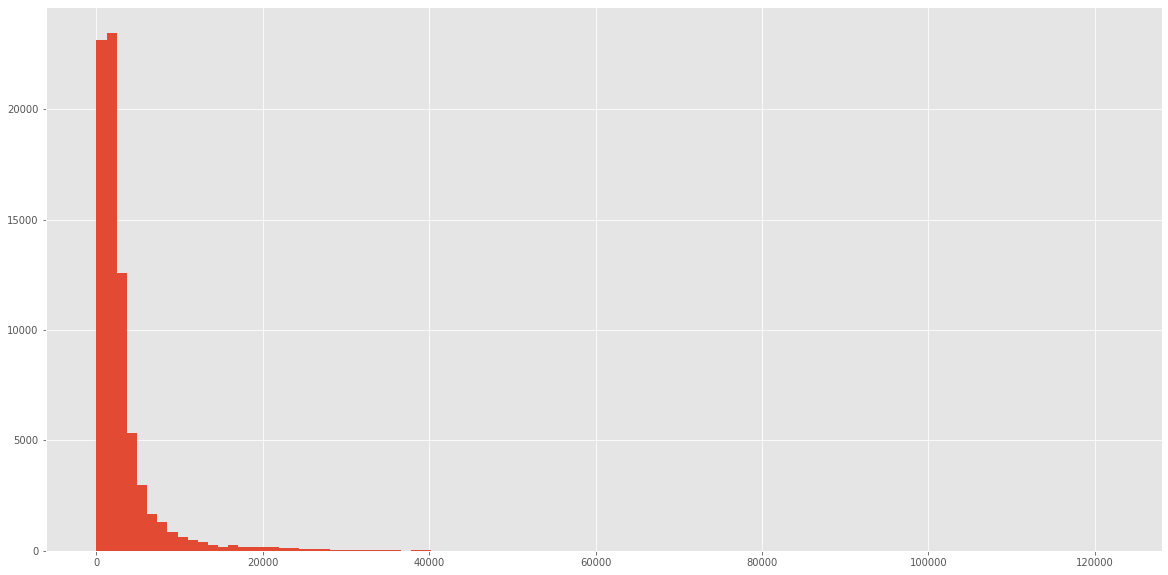

In [ ]:
df_by_bills['Revenue'].hist(figsize=(20,10), bins = 100 );

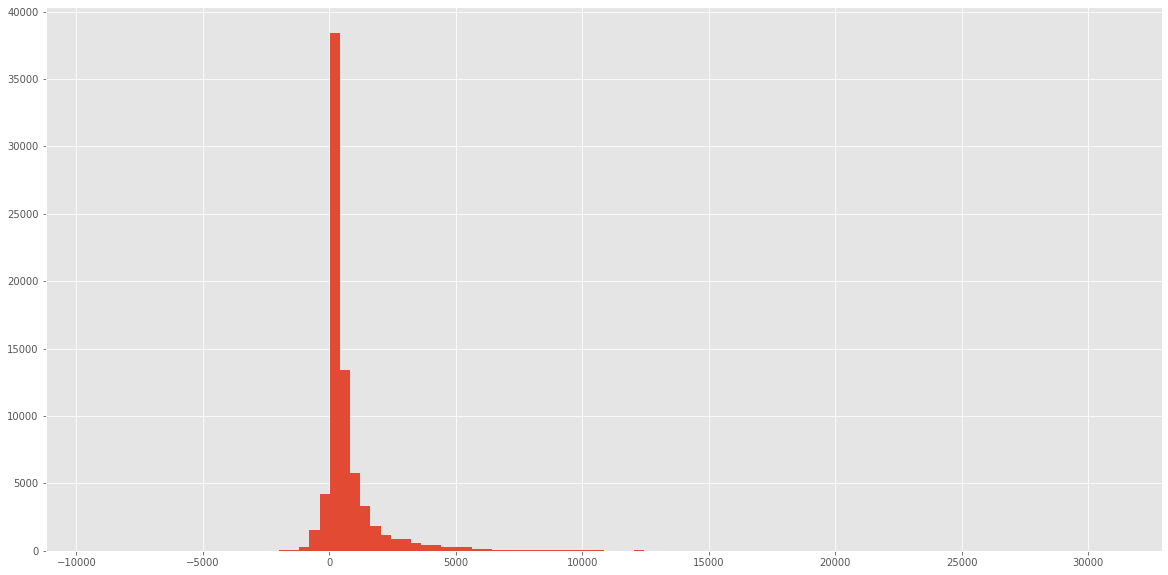

In [ ]:
df_by_bills['Marge'].hist(figsize=(20,10), bins = 100 );

In [ ]:
df_by_bills[['Revenue','Marge']].head()

,Revenue,Marge
0,247.0,63.08
1,13300.0,3246.00
2,16150.0,4436.07
3,4180.0,1345.00
4,18500.0,3400.00


In [ ]:
df_by_bills['Revenue_ln'] = df_by_bills['Revenue']
df_by_bills['Marge_ln'] = df_by_bills['Marge']

In [ ]:
df_by_bills = df_by_bills[(df_by_bills['Marge'] > 0)]


In [ ]:
df_by_bills[['Revenue_ln','Marge_ln']] = df_by_bills[['Revenue_ln','Marge_ln']].apply(lambda w: np.log(w + 1))
df_by_bills.replace([np.inf, -np.inf], np.nan).dropna(subset=['Revenue_ln','Marge_ln'], how="all")

,Unnamed: 0,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday,Revenue_ln,Marge_ln
0,0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5,5.513429,4.160132
1,1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3,9.495594,8.085487
2,2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5,9.689737,8.397750
3,3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3,8.338306,7.204893
4,4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4,9.825580,8.131825
...,...,...,...,...,...,...,...,...,...,...,...
75073,75073,4513462_TR,19845.0,10423.00,1,30.04.2017 23:48,2017-04-30,23,6,9.895758,9.251866
75074,75074,4513463_TR,1932.0,429.28,4,30.04.2017 23:48,2017-04-30,23,6,7.566828,6.064436
75075,75075,4513474_TR,2002.0,558.57,10,30.04.2017 23:53,2017-04-30,23,6,7.602401,6.327169
75076,75076,4513480_TR,4864.0,910.86,2,30.04.2017 23:58,2017-04-30,23,6,8.489822,6.815486


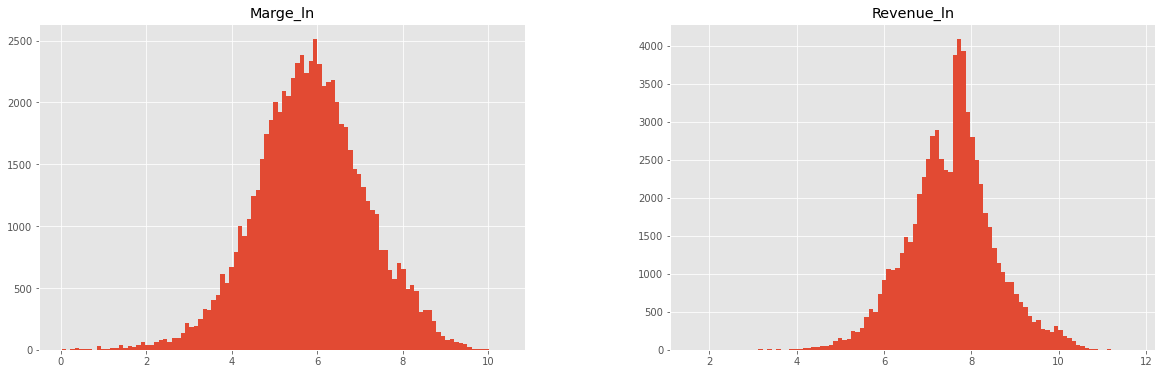

In [ ]:
df_by_bills[['Revenue_ln','Marge_ln']].hist(figsize=(20,6), bins = 100 );

Now lets look how different catigoris of goods are distributed in our data set. What category of products are most often bought? Which category of products brings the most profit, that is, which category is the most marginal? For clarity, let's look at pie chars

In [ ]:

def pieChar(data_names, data_values, title):
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})

    plt.title(title)

    xs = range(len(data_names))

    plt.pie(
        data_values, autopct='%.1f', radius = 1.1)
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = data_names )
    fig.savefig('pie.png')

In [ ]:
type_set = df["Тип"].unique()

In [ ]:
quantity_for_types = []
marge_for_types = []
revenue_for_types = []
for types in type_set:
    quantity_for_types.append(len(df[df["Тип"] == types]))
    marge_for_types.append(df[df["Тип"] == types]['Marge'].sum())
    revenue_for_types.append(df[df["Тип"] == types]['Revenue'].sum())

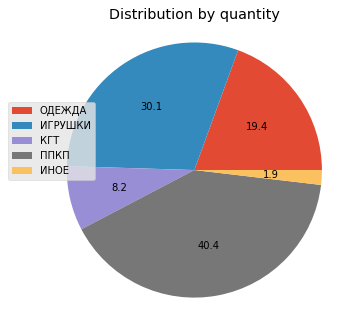

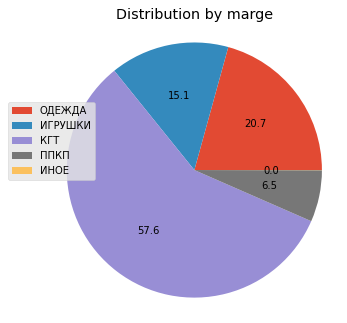

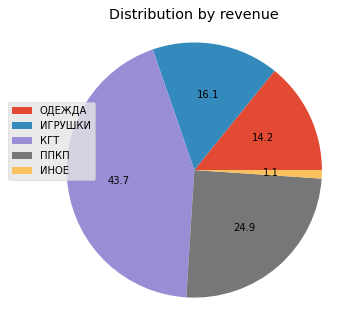

In [ ]:
pieChar(type_set, quantity_for_types, 'Distribution by quantity')
pieChar(type_set, marge_for_types, 'Distribution by marge')
pieChar(type_set, revenue_for_types, 'Distribution by revenue')

In [ ]:
df_by_bills.drop(['Unnamed: 0', 'Revenue_ln', 'Marge_ln'], axis='columns', inplace=True)

In [ ]:
from datetime import datetime

In [ ]:
df_by_dates = df_by_bills.groupby('Date').aggregate(sum)
df_by_dates

,Revenue,Marge,Количество,Hours,Weekday
Date,,,,,
2017-03-01,3634783.51,902241.09,3601,17518,2304
2017-03-02,3494213.15,920122.91,3190,15733,3240
2017-03-03,3126095.19,767155.54,3218,15022,4156
2017-03-04,3250778.44,830332.98,3038,14140,4705
2017-03-05,3409089.59,891829.54,3162,15403,6108
...,...,...,...,...,...
2017-04-26,3204886.76,800001.57,4667,14912,2138
2017-04-27,2560832.98,616444.38,3574,11531,2532
2017-04-28,3012607.65,737103.54,4745,11682,3868


In [ ]:
df_by_dates = df_by_dates.reset_index()
df_by_dates

,Date,Revenue,Marge,Количество,Hours,Weekday
0,2017-03-01,3634783.51,902241.09,3601,17518,2304
1,2017-03-02,3494213.15,920122.91,3190,15733,3240
2,2017-03-03,3126095.19,767155.54,3218,15022,4156
3,2017-03-04,3250778.44,830332.98,3038,14140,4705
4,2017-03-05,3409089.59,891829.54,3162,15403,6108
...,...,...,...,...,...,...
56,2017-04-26,3204886.76,800001.57,4667,14912,2138
57,2017-04-27,2560832.98,616444.38,3574,11531,2532
58,2017-04-28,3012607.65,737103.54,4745,11682,3868
59,2017-04-29,3084290.41,760416.42,3414,9280,4300


In [ ]:
weekdays = []
for item in df_by_dates['Date']:
    
    x =  pd.to_datetime(item, format="%Y-%m-%d")
    a = x.timetuple()
    weekdays.append(a[6])

df_by_dates['Weekday'] = weekdays

In [ ]:
df_by_dates

,Date,Revenue,Marge,Количество,Hours,Weekday
0,2017-03-01,3634783.51,902241.09,3601,17518,2
1,2017-03-02,3494213.15,920122.91,3190,15733,3
2,2017-03-03,3126095.19,767155.54,3218,15022,4
3,2017-03-04,3250778.44,830332.98,3038,14140,5
4,2017-03-05,3409089.59,891829.54,3162,15403,6
...,...,...,...,...,...,...
56,2017-04-26,3204886.76,800001.57,4667,14912,2
57,2017-04-27,2560832.98,616444.38,3574,11531,3
58,2017-04-28,3012607.65,737103.54,4745,11682,4
59,2017-04-29,3084290.41,760416.42,3414,9280,5


In [ ]:

num_unique_bills = []
for day in set(df_by_dates['Date']):
    num_unique_bills.append(len(df_by_bills[df_by_bills['Date'] == day]))
    

In [ ]:
df_by_bills['Date'] = pd.to_datetime(df_by_bills['Date'])

In [ ]:
df_by_dates['UniqueBills'] = num_unique_bills


In [ ]:
df_by_dates

,Date,Revenue,Marge,Количество,Hours,Weekday,UniqueBills
0,2017-03-01,3634783.51,902241.09,3601,17518,2,1395
1,2017-03-02,3494213.15,920122.91,3190,15733,3,842
2,2017-03-03,3126095.19,767155.54,3218,15022,4,2294
3,2017-03-04,3250778.44,830332.98,3038,14140,5,830
4,2017-03-05,3409089.59,891829.54,3162,15403,6,1504
...,...,...,...,...,...,...,...
56,2017-04-26,3204886.76,800001.57,4667,14912,2,1032
57,2017-04-27,2560832.98,616444.38,3574,11531,3,1095
58,2017-04-28,3012607.65,737103.54,4745,11682,4,807
59,2017-04-29,3084290.41,760416.42,3414,9280,5,1421


In [ ]:
df_by_dates.to_csv(path+'clean_data_grouped_by_dates.csv')

In [ ]:
#уникальные чеки, количество товаров, выручка, маржа